# Stock Trend Prediction

### Installing Libraries

In [2]:
# !pip install pandas_datareader

In [3]:
# !pip install yfinance

In [4]:
#!pip install tensorflow keras
#!pip install --upgrade tensorflow keras

In [5]:
# !pip install optree==0.1.0

### Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

### Import Data

In [7]:
start = '2010-01-01'
end = '2023-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04 00:00:00+00:00,6.447413,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05 00:00:00+00:00,6.458559,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06 00:00:00+00:00,6.355828,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07 00:00:00+00:00,6.344077,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08 00:00:00+00:00,6.386253,7.570714,7.571429,7.466429,7.510714,447610800


In [8]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-22 00:00:00+00:00,192.656189,193.600006,195.410004,192.970001,195.179993,37122800
2023-12-26 00:00:00+00:00,192.108841,193.050003,193.889999,192.830002,193.610001,28919300
2023-12-27 00:00:00+00:00,192.208359,193.149994,193.500000,191.089996,192.490005,48087700
2023-12-28 00:00:00+00:00,192.636261,193.580002,194.660004,193.169998,194.139999,34049900
2023-12-29 00:00:00+00:00,191.591385,192.529999,194.399994,191.729996,193.899994,42628800


In [9]:
df = df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04 00:00:00+00:00,6.447413,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05 00:00:00+00:00,6.458559,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06 00:00:00+00:00,6.355828,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07 00:00:00+00:00,6.344077,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08 00:00:00+00:00,6.386253,7.570714,7.571429,7.466429,7.510714,447610800


In [10]:
df.shape

(3522, 7)

In [11]:
df.columns

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [12]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

<ipython-input-12-366cd48ce45b>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date','Adj Close'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


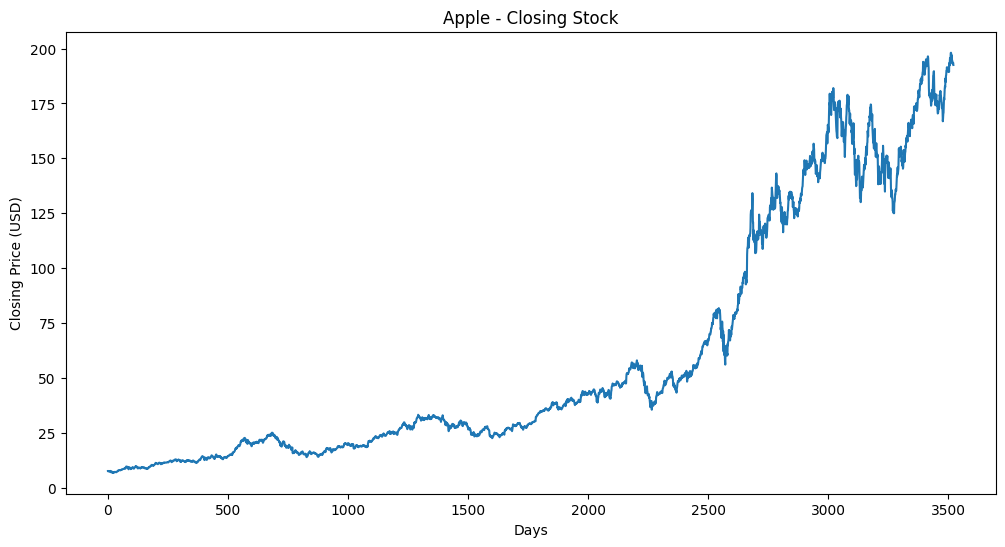

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df['Close'])
plt.title("Apple - Closing Stock")
plt.xlabel('Days')
plt.ylabel("Closing Price (USD)")
plt.show()

### 100 Days Moving Average

In [14]:
ma100 = df['Close'].rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3517,181.768301
3518,181.787101
3519,181.898701
3520,182.046001


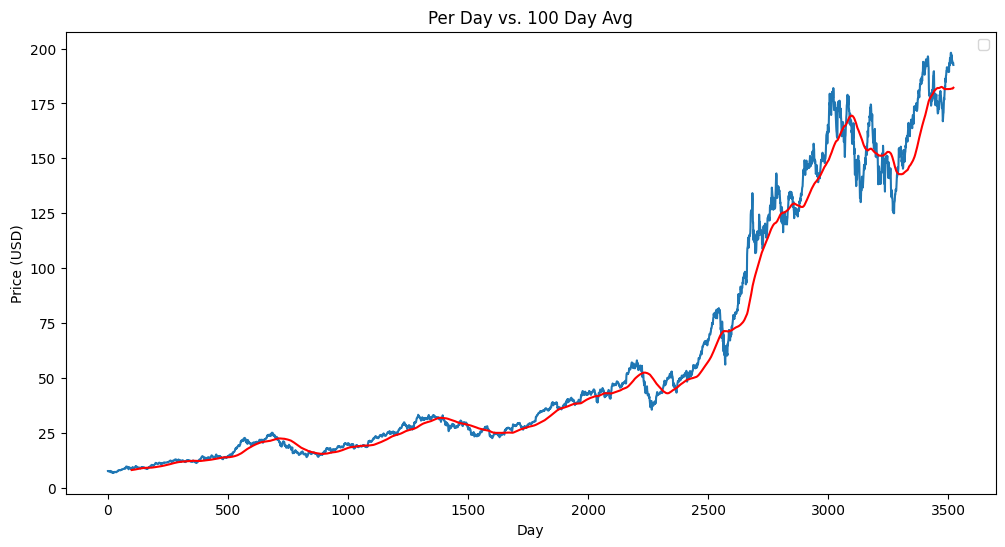

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.title("Per Day vs. 100 Day Avg")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Price (USD)")
plt.show()

### 200 Days Moving Average

In [16]:
ma200 = df['Close'].rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3517,178.649100
3518,178.871851
3519,179.085250
3520,179.290201


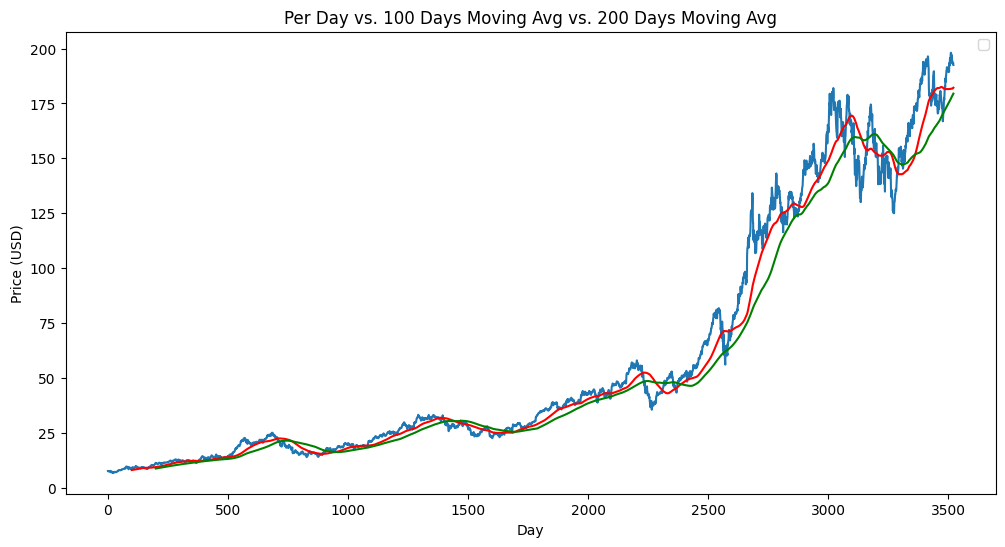

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title("Per Day vs. 100 Days Moving Avg vs. 200 Days Moving Avg")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Price (USD)")
plt.show()

### Train-Test Split

In [18]:
# First 70% for training
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

# Next 30% for testing
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

# Size
print("Training Set Size :", data_training.shape)
print("Testing Set Size: ", data_testing.shape)

Training Set Size : (2465, 1)
Testing Set Size:  (1057, 1)


In [19]:
data_training.head()

Ticker,AAPL
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [20]:
data_testing.head()

Ticker,AAPL
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


### Scaling down the data

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [23]:
data_training_array.shape

(2465, 1)

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])

In [25]:
x_train

[array([[1.50264684e-02],
        [1.52796526e-02],
        [1.29463071e-02],
        [1.26794281e-02],
        [1.36374041e-02],
        [1.23578431e-02],
        [1.07224283e-02],
        [1.27273278e-02],
        [1.18925316e-02],
        [9.49760070e-03],
        [1.57312602e-02],
        [1.34663520e-02],
        [1.09619177e-02],
        [3.90030483e-03],
        [7.54060090e-03],
        [9.50444351e-03],
        [1.08319225e-02],
        [4.95407114e-03],
        [6.83368042e-06],
        [1.83381997e-03],
        [2.60703994e-03],
        [4.91301424e-03],
        [0.00000000e+00],
        [2.33332729e-03],
        [1.41641731e-03],
        [2.83285288e-03],
        [2.10068067e-03],
        [4.52982566e-03],
        [5.69992898e-03],
        [7.76641384e-03],
        [7.18479272e-03],
        [7.44480147e-03],
        [6.58262488e-03],
        [5.72729111e-03],
        [3.42815963e-03],
        [5.89152784e-03],
        [6.80843782e-03],
        [8.60121003e-03],
        [1.1

### Convert x_train and y_train to Numpy Arrays to be able to provide them to the LSTM Model

In [26]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
x_train.shape

(2365, 100, 1)

### ML Model

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [29]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 24s 247ms/step - loss: 0.0694
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 22s 271ms/step - loss: 0.0073
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - loss: 0.0066
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - loss: 0.0061
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - loss: 0.0061
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 246ms/step - loss: 0.0055
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 271ms/step - loss: 0.0041
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - loss: 0.0048
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 22s 270ms/step - loss: 0.0056
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - loss: 0.0048
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 22s 270ms/step - loss: 0.0042
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - loss: 0.0032
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 22s 271ms/step - loss: 0.0037
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - loss: 0.0037
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 24s 

In [33]:
model.save('keras_model.h5')

### Predict Values for Testing Data

In [34]:
data_testing.head()

Ticker,AAPL
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [35]:
data_training.tail(100)

Ticker,AAPL
2365,44.345001
2366,44.575001
2367,43.767502
2368,43.325001
2369,44.910000
...,...
2460,59.052502
2461,58.967499
2462,58.830002
2463,58.592499


In [36]:
past_100_days = data_training.tail(100)

In [38]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [39]:
final_df.head()

Ticker,AAPL
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000


In [40]:
# Apply MinMaxScaler to scale down testing data

input_data = scaler.fit_transform(final_df)
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [42]:
input_data.shape

(1157, 1)

In [43]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [44]:
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


### Making Predictions

In [45]:
y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step


In [46]:
y_predicted.shape

(1057, 1)

In [47]:
y_test

array([0.10193171, 0.10855379, 0.10766548, ..., 0.96795551, 0.97073361,
       0.96394998])

In [48]:
y_predicted

array([[0.1513223 ],
       [0.15274575],
       [0.15419412],
       ...,
       [0.8813865 ],
       [0.87739253],
       [0.8733221 ]], dtype=float32)

In [49]:
# Now to scale these values up

scaler.scale_   #This will give the factor by which all the vales were scaled up

array([0.00646057])

In [50]:
scale_factor = 1/0.00646057

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

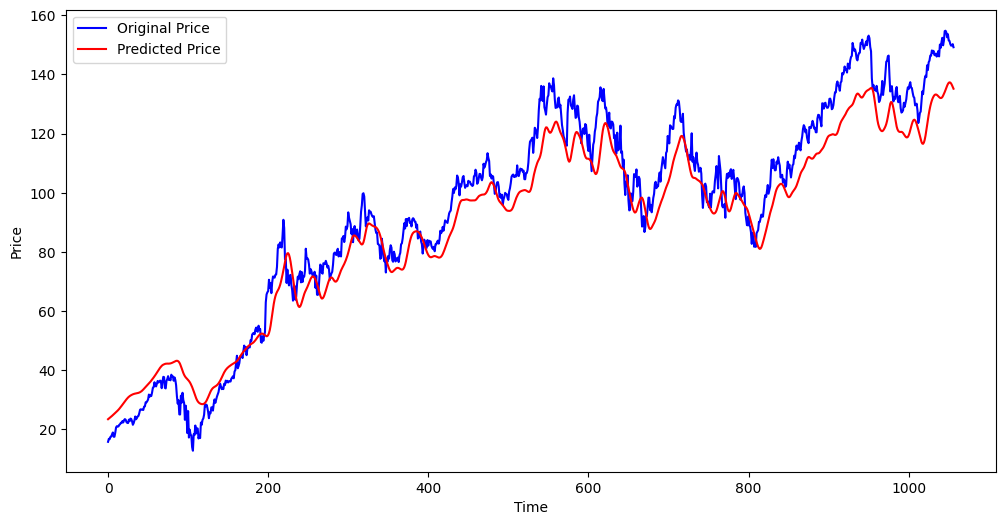

In [51]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()